In [2]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr

In [3]:
df = pd.read_excel("iris_xlsx.xlsx")
df.head()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [4]:
pearsonr(df["Sepal.Length"], df["Sepal.Width"])

(-0.11756978413300204, 0.15189826071144918)

In [5]:
stat, p = pearsonr(df["Sepal.Length"], df["Sepal.Width"])
print("Stat: ", round(stat, 3)) # 검정통계량
print("p-value: ", round(p, 3)) # p-value

Stat:  -0.118
p-value:  0.152


두 집단(Sepal.Length, Sepal.Width)간 피어슨 상관계수를 알아본 결과, 유의수준 5%(0.05) 기준으로 p-value가 크기 때문에(0.152) 두 집단간 선형관계가 존재하지 않는다는 귀무가설을 기각 할 수 없다. 즉, 계산된 상관계수인 -0.118은 0과 크게 다르지 않다고 할 수 있고 두 집단간 선형관계는 존재한다고 하기 어렵다.

In [6]:
stat, p = pearsonr(df["Petal.Length"], df["Petal.Width"])
print("Stat: ", round(stat, 3)) # 검정통계량
print("p-value: ", round(p, 3)) # p-value

Stat:  0.963
p-value:  0.0


두 집단(Sepal.Length, Sepal.Width)간 피어슨 상관계수를 알아본 결과, 유의수준 5%(0.05) 기준으로 p-value가 작기 때문에(0.0) 두 집단간 선형관계가 존재하지 않는다는 귀무가설을 기각 하고 두 집단간 선형관계가 존재한다는 대립가설을 채택한다. 즉, 두 집단간 선형관계는 존재하며 그 강함은 0.963이라고 할 수 있다.

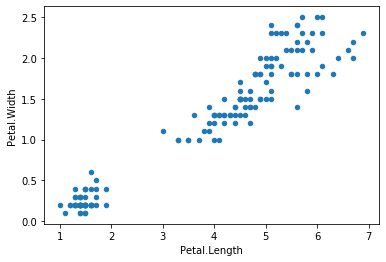

In [19]:
df.plot(x  = "Petal.Length", y = "Petal.Width",
        kind = "scatter")

In [8]:
df.corr()

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
Sepal.Length      1.000000    -0.117570      0.871754     0.817941
Sepal.Width      -0.117570     1.000000     -0.428440    -0.366126
Petal.Length      0.871754    -0.428440      1.000000     0.962865
Petal.Width       0.817941    -0.366126      0.962865     1.000000

In [10]:
bike = pd.read_csv("bike.csv")
bike.corr().round(2)

season  holiday  workingday  weather  temp  atemp  humidity  \
season        1.00     0.03       -0.01     0.01  0.26   0.26      0.19   
holiday       0.03     1.00       -0.25    -0.01  0.00  -0.01      0.00   
workingday   -0.01    -0.25        1.00     0.03  0.03   0.02     -0.01   
weather       0.01    -0.01        0.03     1.00 -0.06  -0.06      0.41   
temp          0.26     0.00        0.03    -0.06  1.00   0.98     -0.06   
atemp         0.26    -0.01        0.02    -0.06  0.98   1.00     -0.04   
humidity      0.19     0.00       -0.01     0.41 -0.06  -0.04      1.00   
windspeed    -0.15     0.01        0.01     0.01 -0.02  -0.06     -0.32   
casual        0.10     0.04       -0.32    -0.14  0.47   0.46     -0.35   
registered    0.16    -0.02        0.12    -0.11  0.32   0.31     -0.27   
count         0.16    -0.01        0.01    -0.13  0.39   0.39     -0.32   

            windspeed  casual  registered  count  
season          -0.15    0.10        0.16   0.16  
holiday          0.01    0.04       -0.02  -0.01  
workingday       0.01   -0.32        0.12   0.01  
weather          0.01   -0.14       -0.11  -0.13  
temp            -0.02    0.47        0.32   0.39  
atemp           -0.06    0.46        0.31   0.39  
humidity        -0.32   -0.35       -0.27  -0.32  
windspeed        1.00    0.09        0.09   0.10  
casual           0.09    1.00        0.50   0.69  
registered       0.09    0.50        1.00   0.97  
count            0.10    0.69        0.97   1.00

In [20]:
from scipy.stats import bartlett

In [21]:
bike = pd.read_csv("bike.csv")
bike.head(2)

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40

In [23]:
bartlett(bike["temp"], bike["atemp"])

BartlettResult(statistic=76.76307062905086, pvalue=1.9274836491850356e-18)

In [24]:
from scipy.stats.stats import pearsonr
from scipy.stats import bartlett

In [26]:
from scipy.stats import ttest_1samp # 단일표본
from scipy.stats import ttest_rel # 대응표본
from scipy.stats import ttest_ind # 독립표본

In [25]:
df = pd.read_excel("iris_xlsx.xlsx")
df.head(2)

Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa

In [27]:
stat, p = ttest_1samp(df["Sepal.Length"], popmean = 4)
print("Stat: ", round(stat, 3)) # 검정통계량
print("p-value: ", round(p, 3)) # p-value

Stat:  27.264
p-value:  0.0


In [28]:
p

8.764592435410748e-60

In [29]:
df["Sepal.Length"].mean()

5.843333333333335

In [34]:
stat, p = ttest_1samp(df["Sepal.Length"], popmean = 5.8)
print("Stat: ", round(stat, 3)) # 검정통계량
print("p-value: ", round(p, 3)) # p-value

Stat:  0.641
p-value:  0.523


In [35]:
True + True

2

In [36]:
True - False

1

In [37]:
False + False

0

In [38]:
True

True

In [ ]:
ser = pd.Series([2, 4, 6, 8])
ser

In [41]:
ser >= 5

0    False
1    False
2     True
3     True
dtype: bool

In [42]:
sum(ser >= 5)

2

In [43]:
(ser >= 5) + 0

0    0
1    0
2    1
3    1
dtype: int32

In [44]:
np.where(ser >= 5, 1, 0)

array([0, 0, 1, 1])

In [46]:
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [49]:
df = pd.read_csv("diamonds.csv")
df.head(2)

carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31

In [53]:
df["cut"].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

In [52]:
formula = "price ~ C(cut)"
lm = ols(formula, df).fit()
anova_lm(lm)

df        sum_sq       mean_sq           F         PR(>F)
C(cut)        4.0  1.104175e+10  2.760436e+09  175.688717  8.428307e-150
Residual  53935.0  8.474314e+11  1.571209e+07         NaN            NaN

In [55]:
2.760436e+09 / 1.571209e+07

175.68865758788297

In [59]:
df.groupby("cut")["price"].mean().reset_index()

cut        price
0       Fair  4358.757764
1       Good  3928.864452
2      Ideal  3457.541970
3    Premium  4584.257704
4  Very Good  3981.759891

In [60]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [62]:
posthoc = pairwise_tukeyhsd(df["price"], df["cut"])
print(posthoc) # reject 귀무가설 기각 여부

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
 group1   group2   meandiff p-adj    lower      upper   reject
--------------------------------------------------------------
   Fair      Good -429.8933 0.0015  -740.4567 -119.3299   True
   Fair     Ideal -901.2158  0.001 -1180.5785 -621.8531   True
   Fair   Premium  225.4999  0.195   -59.2739  510.2738  False
   Fair Very Good -376.9979 0.0031  -663.8694  -90.1263   True
   Good     Ideal -471.3225  0.001   -642.367 -300.2779   True
   Good   Premium  655.3933  0.001   475.6466  835.1399   True
   Good Very Good   52.8954    0.9  -130.1565  235.9474  False
  Ideal   Premium 1126.7157  0.001  1008.8058 1244.6257   True
  Ideal Very Good  524.2179  0.001   401.3281  647.1078   True
Premium Very Good -602.4978  0.001  -737.2366 -467.7591   True
--------------------------------------------------------------


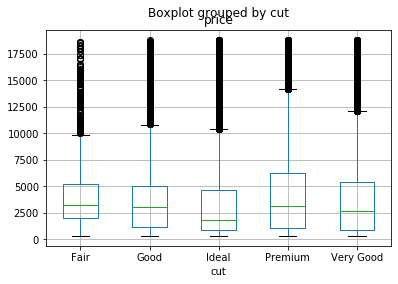

In [64]:
df.boxplot(column = "price", by = "cut")

In [65]:
df.boxplot(column = "price", by = "cut", grid = False)

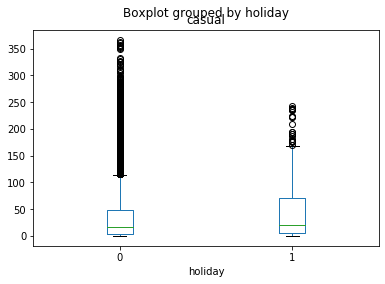

In [68]:
bike.boxplot(column = "casual", by = "holiday", grid = False)

In [69]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot

In [ ]:
df = pd.read_csv("AWS_sample.txt", sep = "#")
df.head(2)

In [ ]:
df = df.loc[df["AWS_ID"] == 108, :]
df["TM"] = pd.to_datetime(df["TM"])
df = df.set_index("TM")
df.head(2)

In [72]:
result = seasonal_decompose(df["TA"], model = "additive")

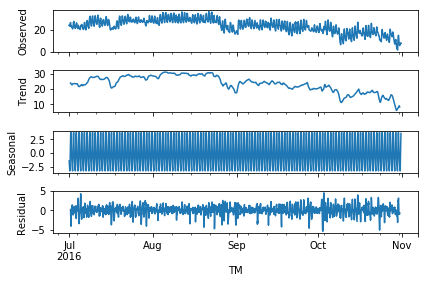

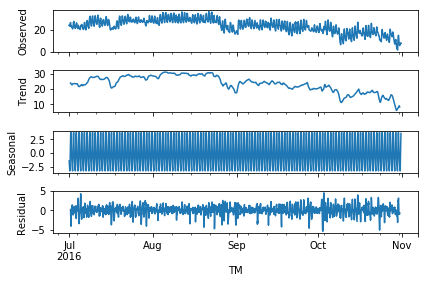

In [73]:
result.plot()